<a href="https://colab.research.google.com/github/nelvinalh/Menambah-Variabel-Baru-Dalam-Data/blob/main/Penambahan_Data_Pada_Data_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone social_status  \
0    man        True  NaN  Southampton    no  False   Lower Class   
1  woman       False    C    Cherbourg   yes  False    High Class   
2  woman       False  NaN  Southampton   yes   True   Lower Class   
3  woman       False    C  Southampton   yes  False    High Class   
4    man        True  NaN  Southampton    no   True   Lower Class   

   origin_city profession  
0  Southampton        Man  
1    Cherbourg      Woman  
2  Southampton      Woman  
3  Southampton  

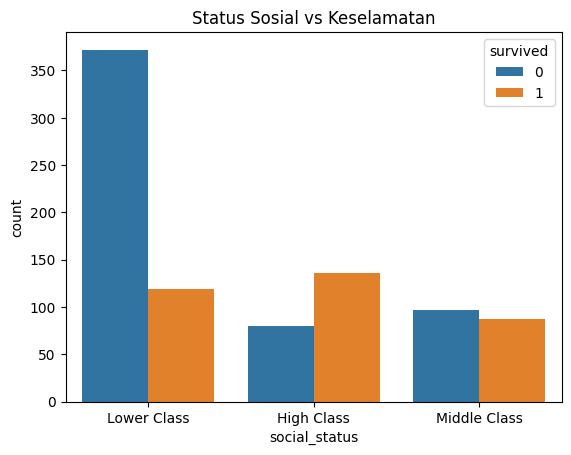

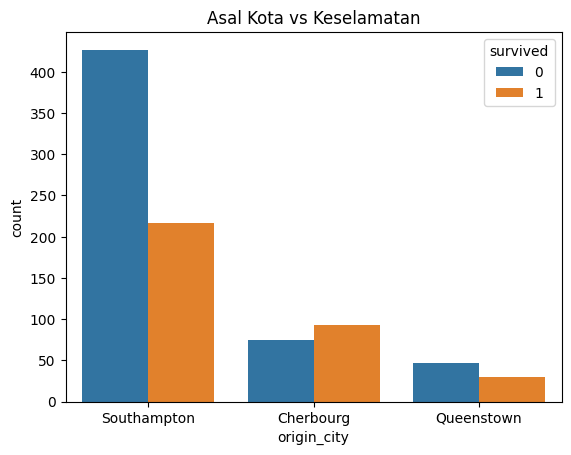

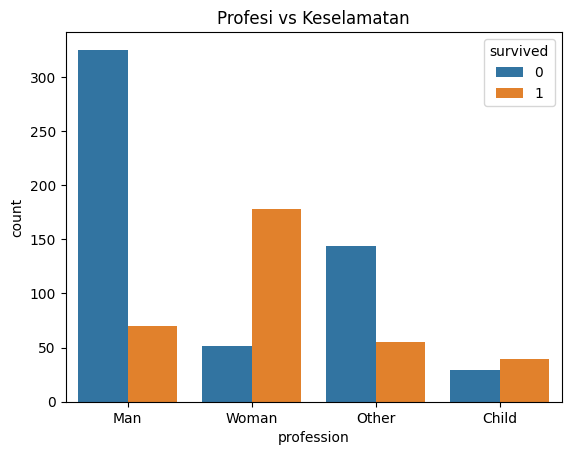

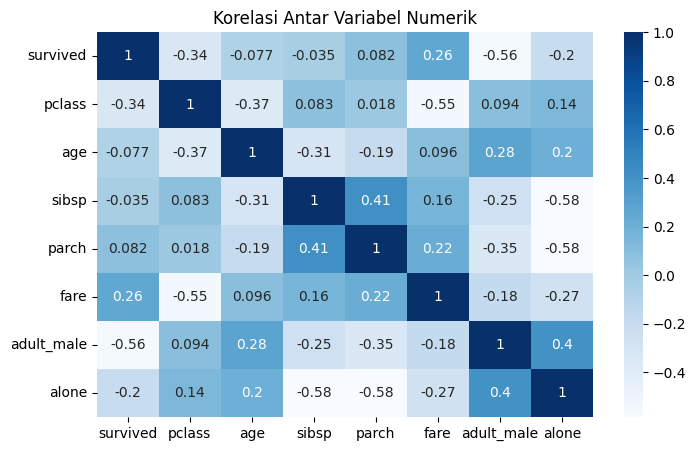


Dataset hasil modifikasi sudah disimpan sebagai titanic_enriched.csv


In [2]:
# Load dataset Titanic dari seaborn
titanic = sns.load_dataset("titanic")

# --- 1. Status Sosial (berdasarkan kelas tiket) ---
def status_sosial(pclass):
    if pclass == 1:
        return "High Class"
    elif pclass == 2:
        return "Middle Class"
    else:
        return "Lower Class"

titanic["social_status"] = titanic["pclass"].apply(status_sosial)

# --- 2. Asal Kota (Embarked) ---
titanic["origin_city"] = titanic["embarked"].map({
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton"
})

# --- 3. Profesi/Title ---
# Dataset seaborn TIDAK punya kolom nama, jadi kita simulasi:
# misalnya: buat profesi berdasarkan usia & jenis kelamin
def assign_profession(row):
    if row["age"] < 12:
        return "Child"
    elif row["sex"] == "female" and row["age"] >= 12:
        return "Woman"
    elif row["sex"] == "male" and row["age"] >= 18:
        return "Man"
    else:
        return "Other"

titanic["profession"] = titanic.apply(assign_profession, axis=1)

# --- 4. Eksplorasi Data ---
print(titanic.head())
print("\nJumlah baris & kolom:", titanic.shape)
print("\nCek missing values:\n", titanic.isnull().sum())

# --- 5. Visualisasi ---

# a. Status sosial vs survival
sns.countplot(data=titanic, x="social_status", hue="survived")
plt.title("Status Sosial vs Keselamatan")
plt.show()

# b. Asal kota vs survival
sns.countplot(data=titanic, x="origin_city", hue="survived")
plt.title("Asal Kota vs Keselamatan")
plt.show()

# c. Profesi (simulasi) vs survival
sns.countplot(data=titanic, x="profession", hue="survived")
plt.title("Profesi vs Keselamatan")
plt.show()

# d. Korelasi numerik
plt.figure(figsize=(8,5))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

# --- 6. Simpan dataset hasil modifikasi ---
titanic.to_csv("titanic_enriched.csv", index=False)
print("\nDataset hasil modifikasi sudah disimpan sebagai titanic_enriched.csv")

In [ ]:
# Mendapatkan daftar dataset yang tersedia di Seaborn
datasets = sns.get_dataset_names()

# Menampilkan daftar dataset
for dataset in datasets:
    print(dataset)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [ ]:
# 2. Informasi Dasar dan Statistik Deskriptif
print("\nInformasi Dataset:")
print(titanic.info())

print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(titanic.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_numeric  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB
None

Statistik 


Jumlah Missing Values per Kolom:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_numeric      0
dtype: int64


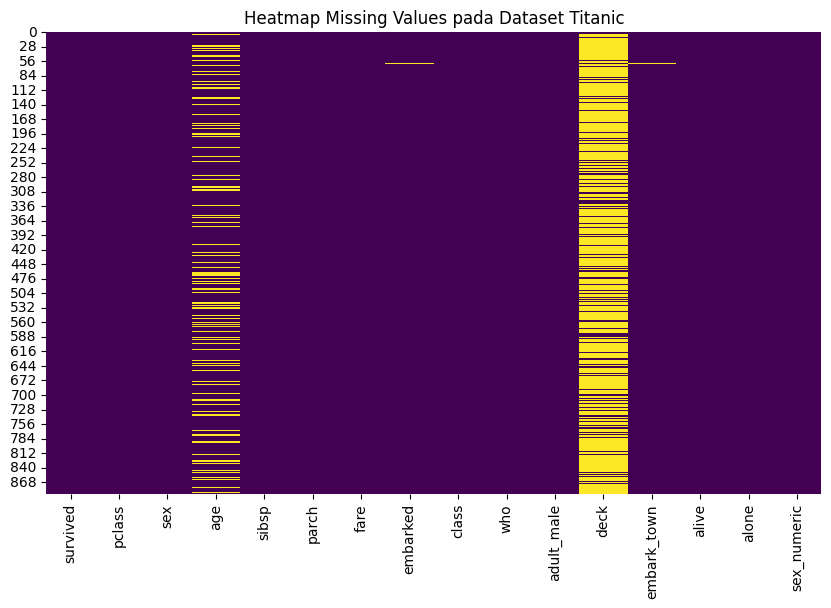

In [ ]:
# 3. Analisis Missing Values
# Menghitung jumlah missing values per kolom
missing_values = titanic.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)

# Visualisasi missing values menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values pada Dataset Titanic")
plt.show()

/tmp/ipython-input-2728063282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic, palette='pastel')


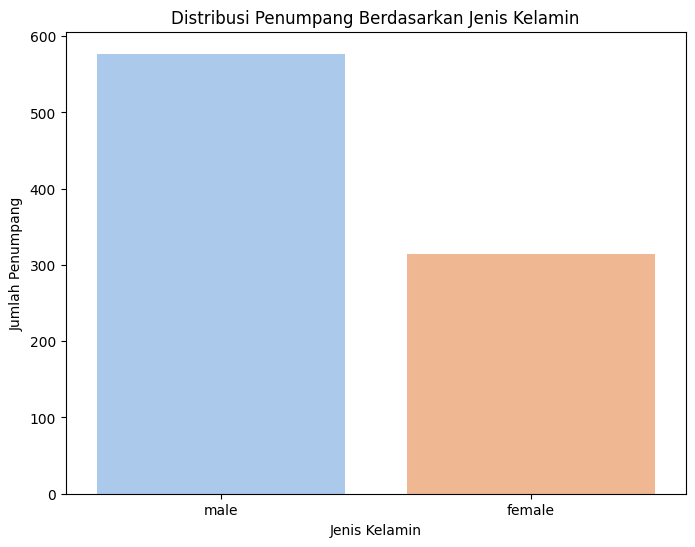

/tmp/ipython-input-2728063282.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic, palette='Set2')


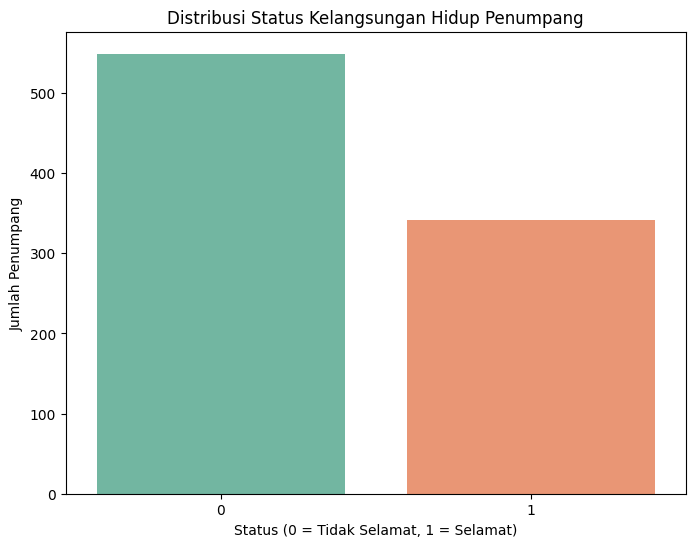

/tmp/ipython-input-2728063282.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=titanic, palette='Set2')


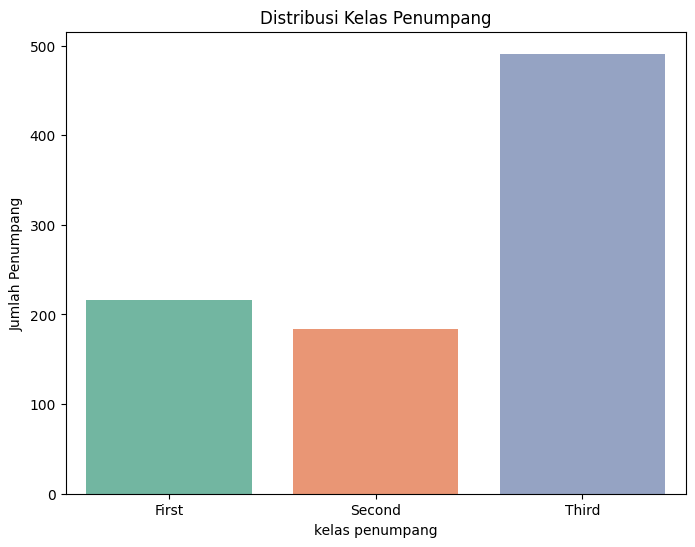

In [ ]:
# 4. Analisis Variabel Kategorik
# Distribusi jumlah penumpang berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic, palette='pastel')
plt.title("Distribusi Penumpang Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.show()

# Distribusi status kelangsungan hidup (Survived)
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=titanic, palette='Set2')
plt.title("Distribusi Status Kelangsungan Hidup Penumpang")
plt.xlabel("Status (0 = Tidak Selamat, 1 = Selamat)")
plt.ylabel("Jumlah Penumpang")
plt.show()


# Distribusi status kelangsungan hidup (Survived)
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titanic, palette='Set2')
plt.title("Distribusi Kelas Penumpang")
plt.xlabel("kelas penumpang")
plt.ylabel("Jumlah Penumpang")
plt.show()


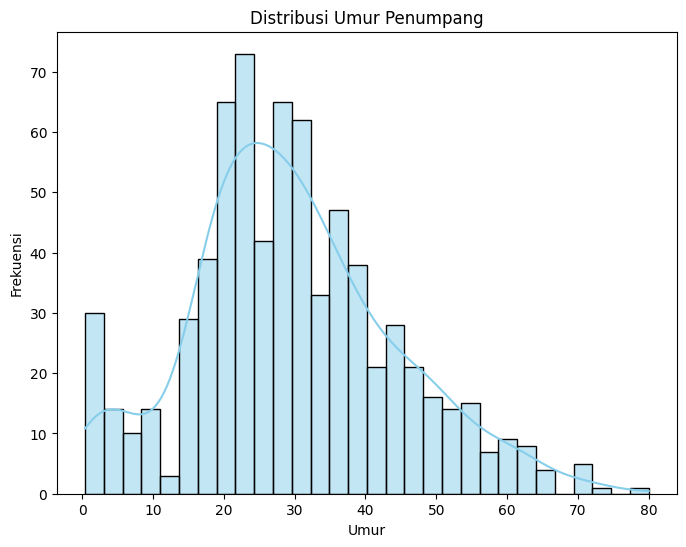

/tmp/ipython-input-3983372346.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')


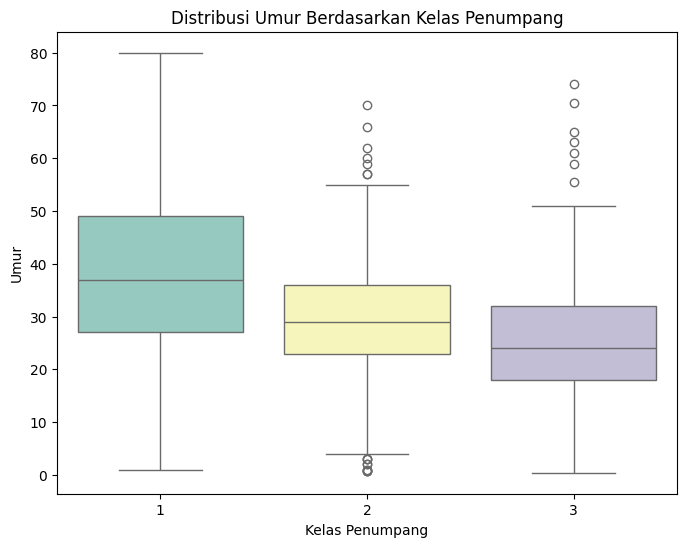

In [ ]:
# 5. Analisis Variabel Numerik
# Histogram Distribusi Usia (Age)
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribusi Umur Penumpang")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

# Boxplot Umur berdasarkan Kelas Penumpang (pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')
plt.title("Distribusi Umur Berdasarkan Kelas Penumpang")
plt.xlabel("Kelas Penumpang")
plt.ylabel("Umur")
plt.show()


Matriks Korelasi:
             survived    pclass       age     sibsp     parch      fare  \
survived     1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass      -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age         -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp       -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch        0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare         0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
sex_numeric -0.543351  0.131900  0.093254 -0.114631 -0.245489 -0.182333   

             sex_numeric  
survived       -0.543351  
pclass          0.131900  
age             0.093254  
sibsp          -0.114631  
parch          -0.245489  
fare           -0.182333  
sex_numeric     1.000000  


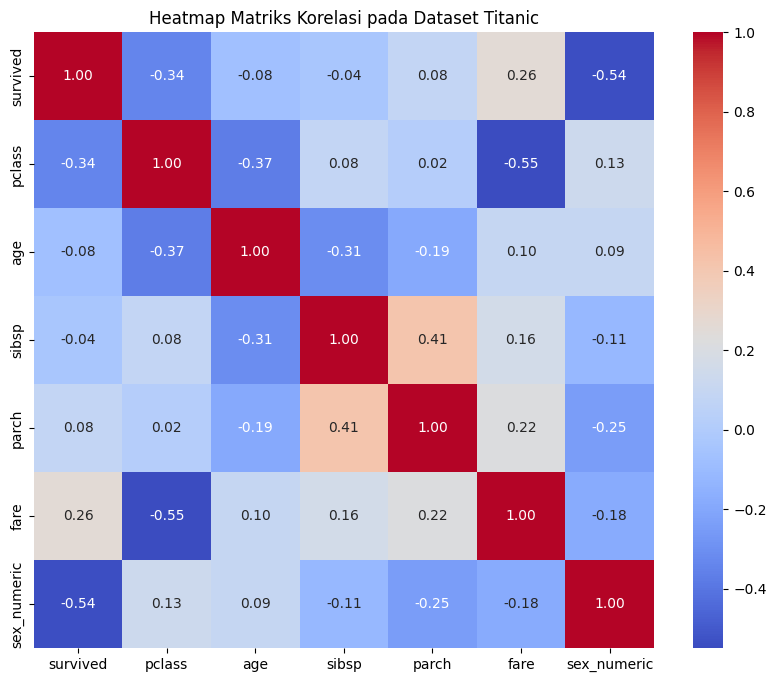

In [ ]:
# 6. Analisis Korelasi antar Variabel Numerik
# Hanya memilih kolom numerik agar tidak terjadi error konversi
numeric_data = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matriks Korelasi pada Dataset Titanic")
plt.show()

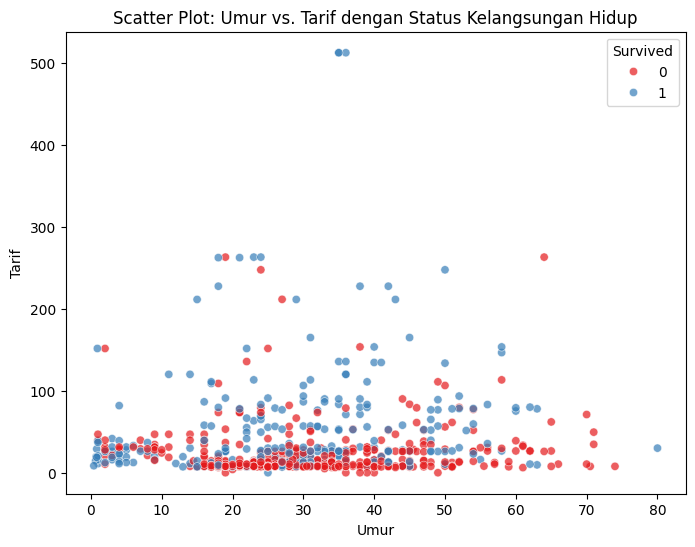

In [ ]:
# 7. Visualisasi Hubungan Antar Variabel
# Scatter Plot: Hubungan antara Umur (age) dan Tarif (fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=titanic, hue='survived', palette='Set1', alpha=0.7)
plt.title("Scatter Plot: Umur vs. Tarif dengan Status Kelangsungan Hidup")
plt.xlabel("Umur")
plt.ylabel("Tarif")
plt.legend(title="Survived", loc="upper right")
plt.show()

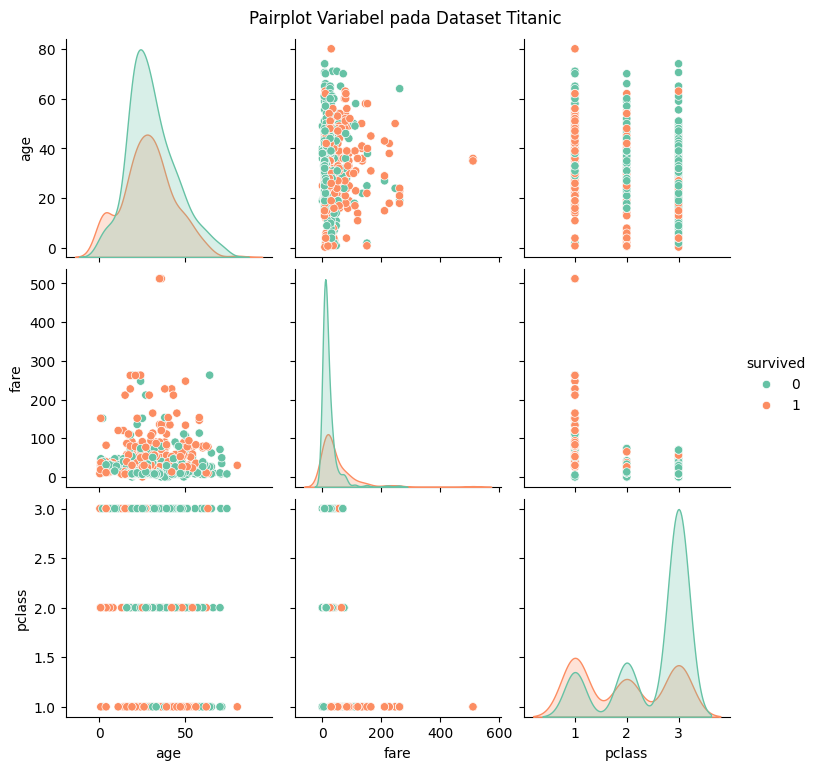

In [ ]:
# 8. Analisis Lanjutan: Pairplot
# Pairplot untuk melihat hubungan antar variabel numerik dan kategorik secara menyeluruh
sns.pairplot(titanic, hue='survived', palette='Set2', vars=['age', 'fare', 'pclass'])
plt.suptitle("Pairplot Variabel pada Dataset Titanic", y=1.02)
plt.show()

# 9. Kesimpulan Sementara dari EDA:
# - Dataset Titanic memiliki beberapa missing values, terutama pada kolom 'age', 'deck', dan 'embark_town'.
# - Distribusi penumpang tampak berbeda berdasarkan jenis kelamin dan status kelangsungan hidup.
# - Variabel 'fare' dan 'age' memiliki sebaran yang cukup bervariasi, dengan outlier yang terlihat di boxplot.
# - Matriks korelasi menunjukkan adanya korelasi antara variabel numerik tertentu, misalnya antara 'fare' dan 'pclass'.
# - Visualisasi hubungan (scatter plot dan pairplot) memberikan wawasan tentang interaksi antar variabel dan perbedaan antara penumpang yang selamat dan tidak.

/tmp/ipython-input-1841079673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex_numeric', y='survived', data=titanic, palette='viridis')


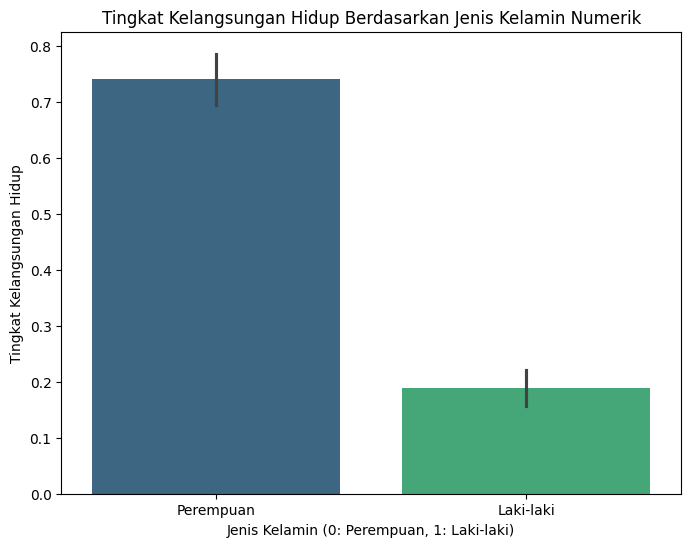

In [ ]:
# Visualisasi hubungan antara sex_numeric dan survived
plt.figure(figsize=(8, 6))
sns.barplot(x='sex_numeric', y='survived', data=titanic, palette='viridis')
plt.title("Tingkat Kelangsungan Hidup Berdasarkan Jenis Kelamin Numerik")
plt.xlabel("Jenis Kelamin (0: Perempuan, 1: Laki-laki)")
plt.ylabel("Tingkat Kelangsungan Hidup")
plt.xticks([0, 1], ['Perempuan', 'Laki-laki']) # Mengganti label sumbu x
plt.show()